In [2]:
!pip install bertopic

In [3]:
!pip install datasets

In [4]:
! pip install sentence_transformers

### Libraries

In [38]:
from datasets import load_dataset
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
import collections
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sentence_transformers import SentenceTransformer
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
# Modelli per UMAP e HDBSCAN
from umap import UMAP
from hdbscan import HDBSCAN


### Load data

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df = pd.concat([train, test], ignore_index=True)


In [7]:
texts = df["clean_text"].dropna().tolist()

In [8]:
texts = df[df["label"] == 1]["clean_text"].dropna().tolist()


Vocabulary considering only words appearing at least 15 times

In [9]:
# Precalcolo embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(texts, show_progress_bar=True)


umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=30, metric='euclidean', prediction_data=True)

# CountVectorizer senza dizionario manuale
vectorizer_model = CountVectorizer(min_df=15, stop_words="english")

topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    language="english",
    verbose=True
)

topics, probs = topic_model.fit_transform(texts, embeddings)


Batches:   0%|          | 0/545 [00:00<?, ?it/s]

2025-05-03 14:57:06,542 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-03 14:57:47,879 - BERTopic - Dimensionality - Completed ✓
2025-05-03 14:57:47,881 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-03 14:57:52,667 - BERTopic - Cluster - Completed ✓
2025-05-03 14:57:52,678 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-03 14:57:55,295 - BERTopic - Representation - Completed ✓


In [12]:
# Salva il modello in modo sicuro e compatibile
topic_model.save("bertopic_model", serialization="safetensors", save_embedding_model="all-MiniLM-L6-v2")

# Salva gli embeddings
np.save("embeddings.npy", embeddings)


In [9]:
# General Info
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,19527,-1_ect_vinc_subject_pleas,"[ect, vinc, subject, pleas, cc, enron, hou, th...",[tiger team hi vinc voic mail sent earlier tod...
1,0,941,0_width_td_src_tr,"[width, td, src, tr, height, font, tabl, size,...",[new memori configur make ram shop easi cnet s...
2,1,725,1_email_order_send_address,"[email, order, send, address, peopl, make, sit...",[ilug earn one year work home hello may seen b...
3,2,532,2_spam_spamassassin_header_sfnet,"[spam, spamassassin, header, sfnet, score, tes...",[sadev us spam assassin way flag spam drop alt...
4,3,504,3_ok_lor_ill_im,"[ok, lor, ill, im, come, tonight, finish, yeah...","[ok ill right later, ard lor ok messag ü lor, ..."
...,...,...,...,...,...
218,217,31,217_pill_mg_viagra_health,"[pill, mg, viagra, health, soma, paliourg, men...",[hi paliourg pill complet stock baroni kxm pig...
219,218,31,218_mw_peak_lend_short,"[mw, peak, lend, short, kate, paso, buy, ahead...",[epe lend cal imb short thursday gentleman len...
220,219,30,219_dell_linux_driver_machin,"[dell, linux, driver, machin, instal, redhat, ...",[ilug dell gx v redhat rant swear god careful ...
221,220,30,220_referr_linda_li_molli,"[referr, linda, li, molli, resum, alex, vinc, ...",[referr advis whether li xiao refer alex last ...


In [14]:
# Topic 0
topic_model.get_topic(0)


[('girl', np.float64(0.03717326590713704)),
 ('adult', np.float64(0.02898346030607707)),
 ('sex', np.float64(0.02298968953359313)),
 ('video', np.float64(0.02248438439588561)),
 ('site', np.float64(0.021586887917305682)),
 ('free', np.float64(0.020678403639155615)),
 ('membership', np.float64(0.020453308573314465)),
 ('date', np.float64(0.01916549110434271)),
 ('movi', np.float64(0.018991911418522755)),
 ('http', np.float64(0.018876487138182754))]

# Evaluation

In [22]:
# Carica l'embedding model usato (qui era MiniLM)
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Carica il modello BERTopic
topic_model = BERTopic.load("bertopic_model", embedding_model=embedding_model)

embeddings = np.load("embeddings.npy", allow_pickle=True)



In [13]:
!pip install gensim

In [1]:
!pip install --upgrade --force-reinstall numpy
!pip install --upgrade --force-reinstall gensim


  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (

In [16]:
# 1. Tokenizza i testi (usa i tuoi clean text)
tokenized_texts = [doc.split() for doc in texts]

# 2. Crea dizionario e corpus
dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# 3. Filtra topic validi e sincronizzati col dizionario
topics = topic_model.get_topics()
top_words = []
vocab = set(dictionary.token2id.keys())  # parole presenti nel dizionario

for topic_id, words in topics.items():
    if topic_id == -1:
        continue
    if words is None or len(words) == 0:
        continue
    # Filtra solo le parole presenti nel dizionario
    topic_tokens = [word for word, _ in words[:10] if word in vocab]
    if len(topic_tokens) > 0:
        top_words.append(topic_tokens)

# 4. Calcola Coherence (c_v)
coherence_model = CoherenceModel(
    topics=top_words,
    texts=tokenized_texts,
    dictionary=dictionary,
    coherence='c_v'
)
coherence = coherence_model.get_coherence()
print(f"Coherence Score (c_v): {coherence:.4f}")


Coherence Score (c_v): 0.5930


In [21]:
# Estrai le top-10 parole da ciascun topic
topics = topic_model.get_topics()
topic_words = [
    set([word for word, _ in words[:10]])
    for tid, words in topics.items() if tid != -1 and words is not None
]

# Calcola la Jaccard distance media tra tutte le coppie di topic
def jaccard_distance(a, b):
    return 1 - len(a & b) / len(a | b) if a | b else 0

jaccard_scores = [
    jaccard_distance(a, b)
    for a, b in combinations(topic_words, 2)
]

jaccard_diversity = sum(jaccard_scores) / len(jaccard_scores)
print(f"Jaccard Diversity Score (manual): {jaccard_diversity:.4f}")


Jaccard Diversity Score (manual): 0.9941


# Qualitative analysis

To assess the semantic validity of the topics generated from spam emails, we analyze only those topics that are associated with at least 100 documents. By inspecting the most representative keywords for each of these frequently occurring topics, we aim to determine whether their content aligns with known characteristics of spam communication, such as promotional intent, urgency, prize incentives, or suspicious commercial offers.

In [20]:
topics_info = topic_model.get_topic_info()

min_docs = 100

frequent_topics = topics_info[topics_info['Count'] >= min_docs]['Topic']

for topic_id in frequent_topics:
    if topic_id != -1:
        print(f"\n Topic {topic_id}")
        for word, score in topic_model.get_topic(topic_id):
            print(f"{word}: {round(score, 4)}")



 Topic 0
girl: 0.0372
adult: 0.029
sex: 0.023
video: 0.0225
site: 0.0216
free: 0.0207
membership: 0.0205
date: 0.0192
movi: 0.019
http: 0.0189

 Topic 1
width: 0.0361
font: 0.036
td: 0.0349
size: 0.0339
tr: 0.0335
height: 0.0285
br: 0.0281
tabl: 0.027
href: 0.0247
helvetica: 0.0235

 Topic 2
sa: 0.0123
van: 0.0116
convers: 0.0091
overnight: 0.009
vi: 0.0085
ere: 0.0082
discret: 0.0078
sit: 0.0075
door: 0.0075
defens: 0.0071

 Topic 3
la: 0.1594
en: 0.1296
para: 0.1135
el: 0.1077
lo: 0.0853
del: 0.0758
da: 0.0752
su: 0.067
le: 0.065
est: 0.0592

 Topic 4
mobil: 0.0445
phone: 0.0321
goodby: 0.0201
blood: 0.0188
fw: 0.0155
email: 0.0149
captain: 0.014
fwd: 0.0131
com: 0.0117
eye: 0.0111

 Topic 5
statement: 0.0146
compani: 0.0144
stock: 0.0142
invest: 0.0129
trade: 0.0105
expect: 0.0095
industri: 0.0094
investor: 0.0092
materi: 0.0092
market: 0.0091

 Topic 6
medic: 0.1423
stop: 0.0988
materi: 0.0786
promot: 0.0774
door: 0.0645
appoint: 0.0588
prescript: 0.0557
qualiti: 0.0554
need: 0.05

## Sample emails for topic

We now inspect a couple of sample emails for each frequent topic to evaluate the semantic coherence of documents within the same cluster.


In [22]:
# Ricrea il sotto-DataFrame usato per il training
df_spam = df[df["label"] == 1].copy()
df_spam = df_spam[df_spam["clean_text"].notna()].reset_index(drop=True)

# Associa i topic correttamente
df_spam['topic'] = topics

# Ora puoi campionare email per topic in df_spam
for topic_id in frequent_topics:
    print(f"\nTopic {topic_id}")
    samples = df_spam[df_spam['topic'] == topic_id]['clean_text'].sample(n=2, random_state=42)
    for i, email in enumerate(samples, 1):
        print(f"Email {i}:\n{email[:300]}...\n")



Topic -1
Email 1:
refil confirm need discount viagra refil avail pleas confrm http euq ambein net ph sale fuvvlo custom fill user name paliourg iit demokrito gr...

Email 2:
equiti spotiight nolan vcsc brand new stock attent vocalscap inc stock symbol vcsc break news releas compani friday close watch stock go crazi next week current price project specul price next day project specul price next day vocalscap network inc build compani revolution telecommun industri afford...


Topic 0
Email 1:
hey boy want hot xxx pic sent direct ur phone txt porn hr free p per day stop text stopbcm sf wcnxx...

Email 2:
twink bear scalli skin jock call dont miss weekend fun call pmin stop text call nat rate...


Topic 1
Email 1:
highend custom websit complet html bodi doctyp html public wcdtd html transitionalen htmlhead stylestyl head bodi bgcolordffffff div aligndcenterfont facedarialfont colordffstrongbeaut iful ihighendi icustomi websit redesignedi completei strongfontfontdiv divnbspdiv tabl cellsp

#### Coherent and Thematically Consistent Topics

Many topics exhibit a high degree of **semantic consistency** and are clearly interpretable:

- **Topic 0**: Adult content – "xxx pic", "porn", and "weekend fun" appear repeatedly.
- **Topic 1 & 5**: Stock market / investment frauds – mentions of "stock pick", "investor alert", "news release".
- **Topic 8, 13, 21**: Pharmaceutical spam – references to "v iagra", "pharmaci", "prescript", "drug", "med".
- **Topic 9**: Male enhancement spam – "peni enlarg", "erect", "size increase".
- **Topic 10**: Prize/lottery scams – "winner", "£ prize", "claim".
- **Topic 11 & 25**: Luxury product replicas – frequent brand names (e.g., "Rolex", "Chanel", "Louis Vuitton").
- **Topic 14**: Mortgage scams – keywords like "home", "mortgage", "loan".
- **Topic 16 & 24**: Classic scam pattern – "unclaim fund", "bank", "auditor", "urgent assistance".
- **Topic 27**: Phishing / fake login – email about “account deletion” or “online bank alert”.
- **Topic 28**: Email marketing spam – references to "bulk email", "lead", "advertising".



#### Less Coherent or Mixed Topics

Some topics are **less interpretable**, either due to noisy text or extremely varied content:

- **Topic -1**: Outliers – as expected, includes content not cleanly assignable.
- **Topic 4, 7, 18**: Appear noisy or semantically mixed, likely due to encoding issues or word salad text.
- **Topic 23**: Hard to interpret due to fragmented content and domain-specific terms.

# Visualization

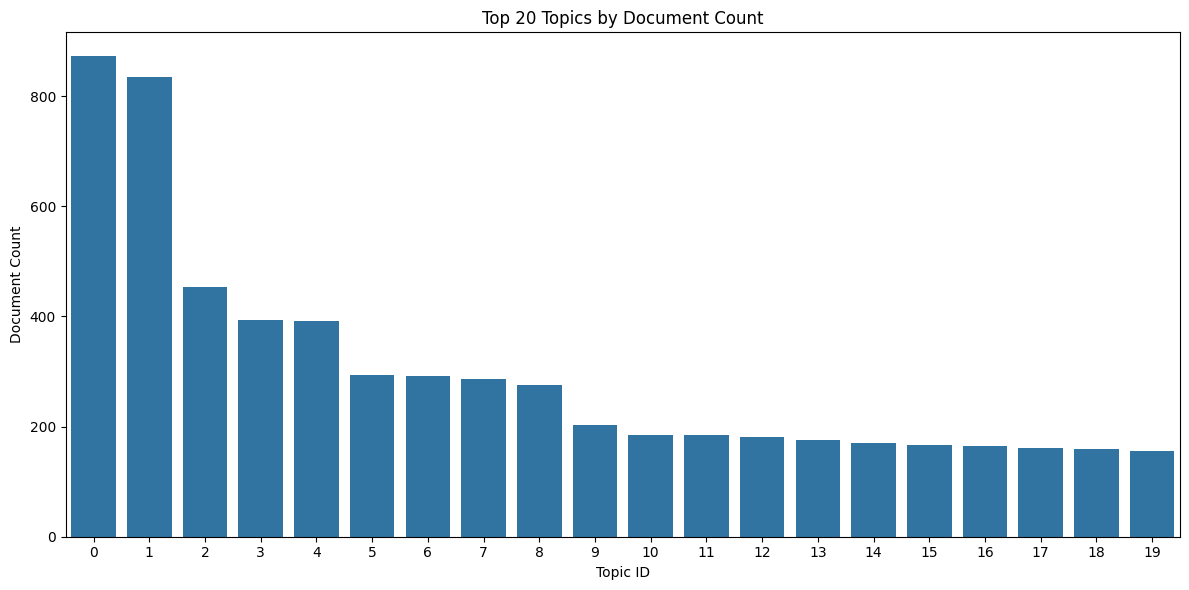

In [24]:
top_n = 20
top_topics = topic_info_sorted.head(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(x="Topic", y="Count", data=top_topics)
plt.title(f"Top {top_n} Topics by Document Count")
plt.xlabel("Topic ID")
plt.ylabel("Document Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


This bar chart illustrates the distribution of documents across the top 20 identified topics. A steep drop is observed after the first two topics, which dominate the dataset and may represent highly recurring spam patterns. The remaining topics show a more balanced distribution, suggesting a variety of more specific or less frequent spam themes.


In [26]:
for topic_id in [0, 1]:
    print(f"\nTopic {topic_id}")
    for word, score in topic_model.get_topic(topic_id):
        print(f"{word}: {round(score, 4)}")



Topic 0
girl: 0.0377
teen: 0.0302
adult: 0.0298
video: 0.0229
site: 0.0226
sex: 0.0219
membership: 0.0212
free: 0.021
http: 0.0195
movi: 0.0194

Topic 1
width: 0.0366
font: 0.0365
td: 0.0363
tr: 0.0349
size: 0.0344
height: 0.0286
br: 0.0285
tabl: 0.0277
href: 0.0248
helvetica: 0.0237


Topic 0 appears to capture content related to adult material and pornographic advertisements. Keywords such as “girl,” “teen,” “adult,” “sex,” and “video” suggest the topic is centered around sexually explicit spam, often promoting free memberships and linking to external websites.

Topic 1 seems to reflect emails with malformed or template-based HTML content. The top keywords—like “font,” “td,” “tr,” “size,” and “href”—indicate that these documents likely contain HTML tags or fragments, possibly resulting from rendering issues or templated spam messages.


In [27]:
topic_model.visualize_topics()


In [28]:
topic_model.visualize_hierarchy()


2025-05-03 15:20:29,441 - BERTopic - WARNING: No c-TF-IDF matrix was found despite it is supposed to be used (`use_ctfidf` is True). Defaulting to semantic embeddings.


In [37]:
topic_model.visualize_documents(
    df["clean_text"].tolist(),
    reduced_embeddings=reduced_embeddings,
    hide_document_hover=True,
    hide_annotations=True
)


This 2D projection displays the distribution of spam emails across the 30 most frequent topics identified by BERTopic. Notably, topics such as "0_girl_teen_adult" and "1_width_font_td" form dense and visually distinct clusters, indicating both semantic coherence and prevalence in the dataset. The UMAP projection reveals overlapping areas between certain topics—suggesting shared vocabulary or similar spam strategies—while others remain clearly separated, highlighting distinct subtypes of spam such as adult content, formatting artifacts, and financial scams.
